<a href="https://colab.research.google.com/github/Nik8x/R_Practice/blob/main/Hotel_satisfaction_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("cluster")
library("cluster")
library("tidyverse")
library('readxl') # package to read excel file
install.packages("car") # installing package
library('car') #  package for the 'some' function
# install.packages("fpc") # installing package
# library("fpc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following o

In [ ]:
options(repr.matrix.max.cols = 150, repr.matrix.max.rows = 50)

In [ ]:
# import the data set and save it as hotel.df
hotel.df <- read.csv("https://goo.gl/oaWKgt")
dim(hotel.df) # dimensions of the dataframe
head(hotel.df, 2) # show top 2 records

[1] 1500   25

,satCleanRoom,satCleanBath,satCleanCommon,satFrontStaff,satDiningStaff,satHouseStaff,satValetStaff,satPerks,satRoomPrice,satDiningPrice,satWifiPrice,satParkingPrice,satCity,satCloseTransp,satCloseEvents,satPoints,satRecognition,satOverall,distanceTraveled,nightsStayed,visitPurpose,avgRoomSpendPerNight,avgFoodSpendPerNight,avgWifiSpendPerNight,eliteStatus
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,6,4,2,2,2,4,4,3,3,4,3,5,3,4,3,4,3,5,790,1,SportsEvent,129,5.00,7.950000,Silver
2,4,6,5,5,5,4,5,6,4,5,5,6,4,5,3,4,5,4,36,7,Concert,139,5.38,8.978571,Gold


In [ ]:
tail(hotel.df, 2) # show last 2 records

,satCleanRoom,satCleanBath,satCleanCommon,satFrontStaff,satDiningStaff,satHouseStaff,satValetStaff,satPerks,satRoomPrice,satDiningPrice,satWifiPrice,satParkingPrice,satCity,satCloseTransp,satCloseEvents,satPoints,satRecognition,satOverall,distanceTraveled,nightsStayed,visitPurpose,avgRoomSpendPerNight,avgFoodSpendPerNight,avgWifiSpendPerNight,eliteStatus
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1499,4,5,6,5,4,6,4,6,5,3,5,4,7,4,5,6,5,5,705,5,Business,159,28.41,4.170,Gold
1500,3,5,4,5,5,5,5,5,4,3,6,5,3,5,4,5,4,5,398,2,Concert,159,65.62,8.975,NoStatus


In [ ]:
str(hotel.df) # structure of the dataframe

'data.frame':	1500 obs. of  25 variables:
 $ satCleanRoom        : int  6 4 5 4 2 5 1 2 2 1 ...
 $ satCleanBath        : int  4 6 4 4 4 3 4 3 4 2 ...
 $ satCleanCommon      : int  2 5 4 4 2 4 2 3 3 5 ...
 $ satFrontStaff       : int  2 5 5 3 4 4 4 2 2 3 ...
 $ satDiningStaff      : int  2 5 5 3 5 4 3 3 2 3 ...
 $ satHouseStaff       : int  4 4 6 4 4 3 5 5 3 3 ...
 $ satValetStaff       : int  4 5 5 4 4 2 3 3 2 3 ...
 $ satPerks            : int  3 6 4 3 4 4 3 3 5 3 ...
 $ satRoomPrice        : int  3 4 4 4 3 4 3 6 3 1 ...
 $ satDiningPrice      : int  4 5 4 3 5 5 4 3 3 4 ...
 $ satWifiPrice        : int  3 5 5 4 3 6 3 4 3 3 ...
 $ satParkingPrice     : int  5 6 4 3 4 5 4 3 4 3 ...
 $ satCity             : int  3 4 4 2 4 4 4 3 4 5 ...
 $ satCloseTransp      : int  4 5 6 4 4 5 1 2 5 5 ...
 $ satCloseEvents      : int  3 3 6 4 5 3 5 3 6 4 ...
 $ satPoints           : int  4 4 4 2 3 3 3 2 5 4 ...
 $ satRecognition      : int  3 5 4 2 3 4 1 2 5 4 ...
 $ satOverall          : int  5 4 5 5 4 

In [ ]:
summary(hotel.df) # summary of all the variables of the dataframe

  satCleanRoom    satCleanBath   satCleanCommon  satFrontStaff   satDiningStaff
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.00  
 1st Qu.:3.000   1st Qu.:4.000   1st Qu.:3.000   1st Qu.:3.000   1st Qu.:3.00  
 Median :4.000   Median :4.000   Median :4.000   Median :4.000   Median :4.00  
 Mean   :4.076   Mean   :4.191   Mean   :3.866   Mean   :3.927   Mean   :3.67  
 3rd Qu.:5.000   3rd Qu.:5.000   3rd Qu.:5.000   3rd Qu.:5.000   3rd Qu.:4.00  
 Max.   :7.000   Max.   :7.000   Max.   :7.000   Max.   :7.000   Max.   :7.00  
 satHouseStaff   satValetStaff      satPerks      satRoomPrice   satDiningPrice
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.00  
 1st Qu.:4.000   1st Qu.:3.000   1st Qu.:4.000   1st Qu.:3.000   1st Qu.:3.00  
 Median :4.000   Median :4.000   Median :4.000   Median :4.000   Median :4.00  
 Mean   :4.316   Mean   :3.719   Mean   :4.301   Mean   :3.847   Mean   :3.71  
 3rd Qu.:5.000   3rd Qu.:4.000   3rd Qu.

In [ ]:
some(hotel.df)

,satCleanRoom,satCleanBath,satCleanCommon,satFrontStaff,satDiningStaff,satHouseStaff,satValetStaff,satPerks,satRoomPrice,satDiningPrice,satWifiPrice,satParkingPrice,satCity,satCloseTransp,satCloseEvents,satPoints,satRecognition,satOverall,distanceTraveled,nightsStayed,visitPurpose,avgRoomSpendPerNight,avgFoodSpendPerNight,avgWifiSpendPerNight,eliteStatus
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
300,5,6,4,5,2,4,5,4,4,4,2,5,3,4,3,4,2,4,283,4,Vacation,141.5000,5.00,6.462500,NoStatus
643,7,4,4,4,3,4,4,3,4,3,3,3,4,4,4,3,3,4,1475,7,SportsEvent,154.7143,14.32,8.692857,NoStatus
671,4,4,3,2,4,4,3,3,4,3,4,4,3,4,3,5,4,1,210,4,Conference,139.0000,40.69,8.975000,NoStatus
774,3,4,3,3,2,2,2,3,6,3,5,4,3,3,5,4,4,4,1318,3,Conference,179.0000,21.30,4.300000,Silver
1092,4,5,4,4,5,5,6,4,5,3,2,2,4,3,5,4,5,3,71,1,Business,139.0000,77.82,5.000000,NoStatus
1134,4,4,3,4,3,5,4,5,3,4,4,4,4,4,5,4,4,2,624,2,Concert,149.0000,38.45,12.950000,Silver
1190,6,7,4,5,3,5,4,3,3,3,4,4,5,4,5,2,4,3,127,7,OtherOrMixed,146.1429,36.31,7.242857,NoStatus
1362,4,5,5,6,5,4,4,6,6,4,5,4,6,4,5,4,4,5,1014,4,Conference,159.0000,32.33,10.712500,Silver
1396,4,4,4,3,4,4,3,3,2,3,6,4,4,5,5,4,3,3,585,3,SportsEvent,152.3333,24.00,4.300000,Silver


In [ ]:
sapply(hotel.df, function(x){sum(is.na(x))}) # check for any missing data

satCleanRoom         satCleanBath       satCleanCommon 
                   0                    0                    0 
       satFrontStaff       satDiningStaff        satHouseStaff 
                   0                    0                    0 
       satValetStaff             satPerks         satRoomPrice 
                   0                    0                    0 
      satDiningPrice         satWifiPrice      satParkingPrice 
                   0                    0                    0 
             satCity       satCloseTransp       satCloseEvents 
                   0                    0                    0 
           satPoints       satRecognition           satOverall 
                   0                    0                    0 
    distanceTraveled         nightsStayed         visitPurpose 
                   0                    0                    0 
avgRoomSpendPerNight avgFoodSpendPerNight avgWifiSpendPerNight 
                   0                    0                    0 
         eliteStatus 
                   0

In [ ]:
# converting the categorical variables as factors to Visualize
hotel.df$visitPurpose <- as.factor(hotel.df$visitPurpose)
hotel.df$eliteStatus <- as.factor(hotel.df$eliteStatus)

In [ ]:
install.packages("gpairs") # installing package for visualization
library("gpairs") # for visualization

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘lmtest’, ‘barcode’, ‘vcd’




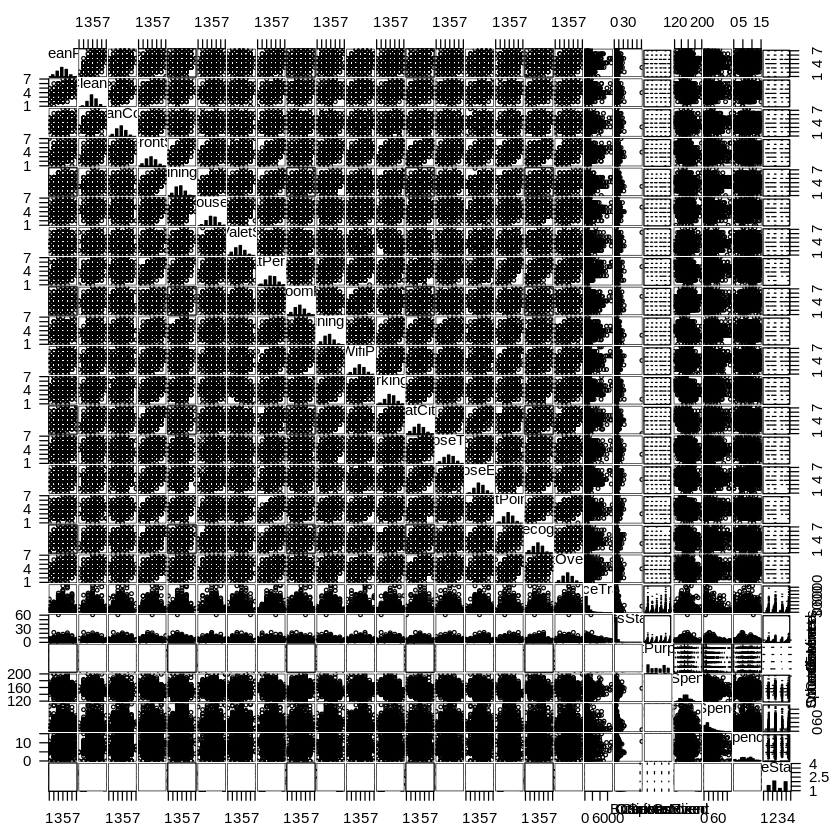

In [ ]:
gpairs(hotel.df) # takes time to generate the visualizations

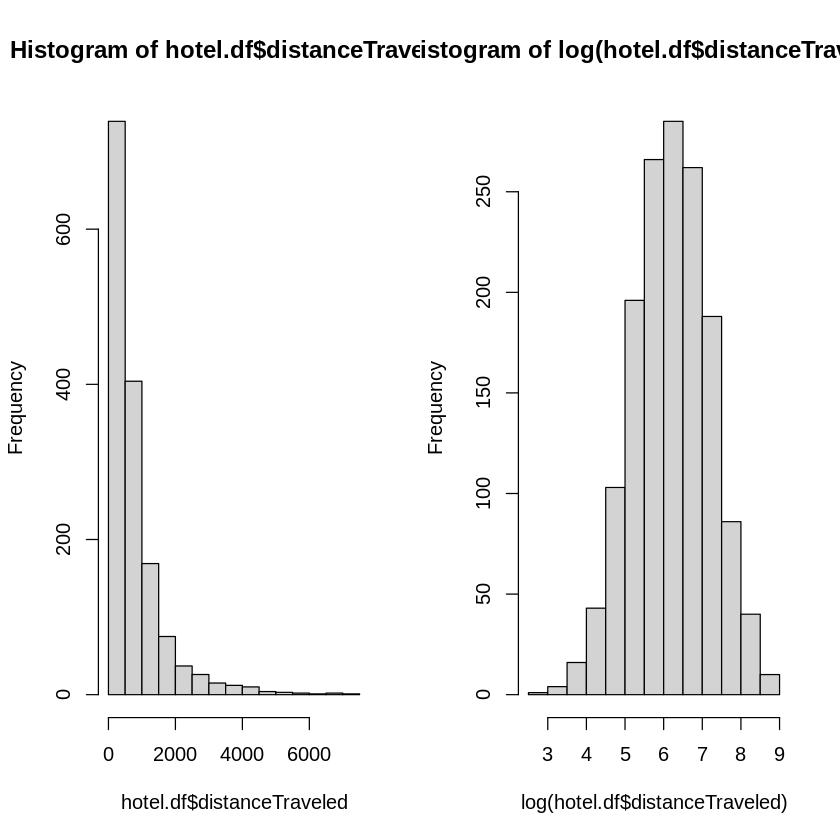

In [ ]:
par(mfrow=c(1, 2)) # requesting two graphs in a row
hist(hotel.df$distanceTraveled)
hist(log(hotel.df$distanceTraveled))

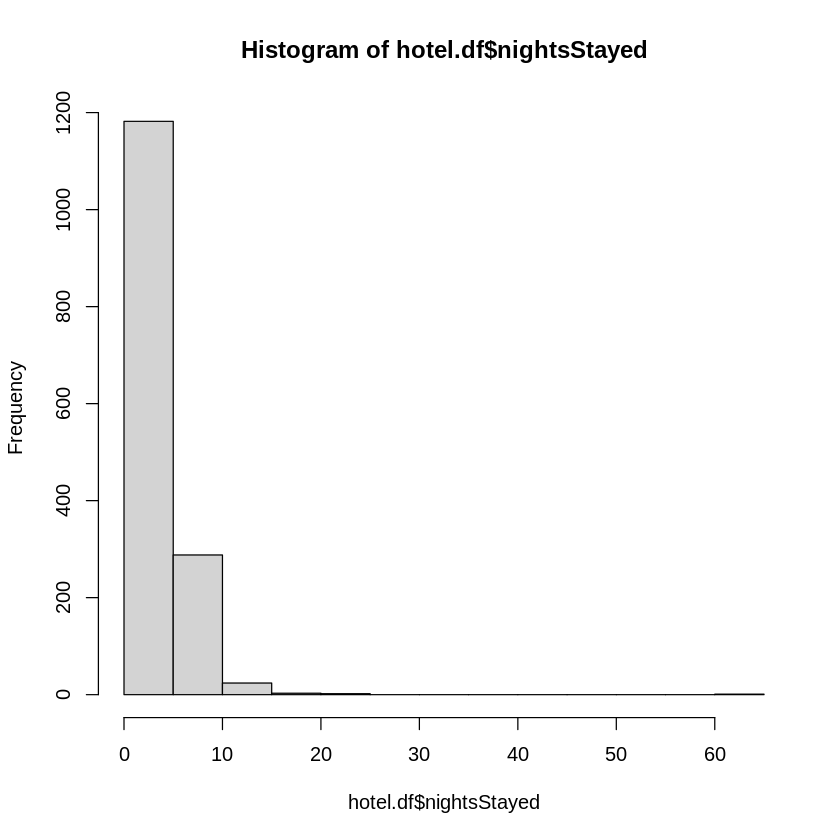

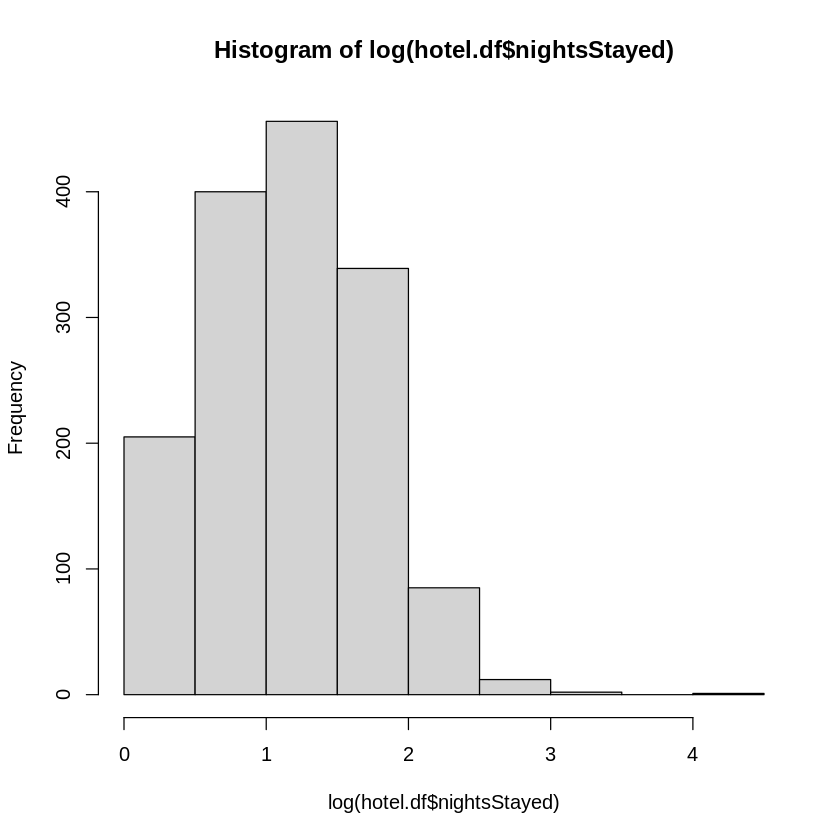

In [ ]:
hist(hotel.df$nightsStayed)
hist(log(hotel.df$nightsStayed))

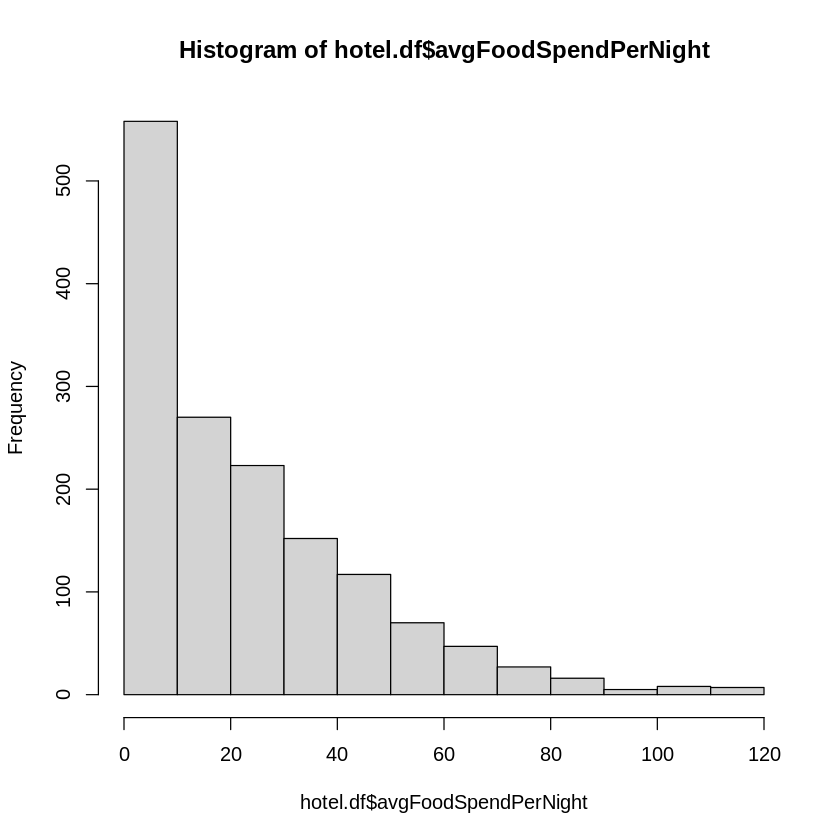

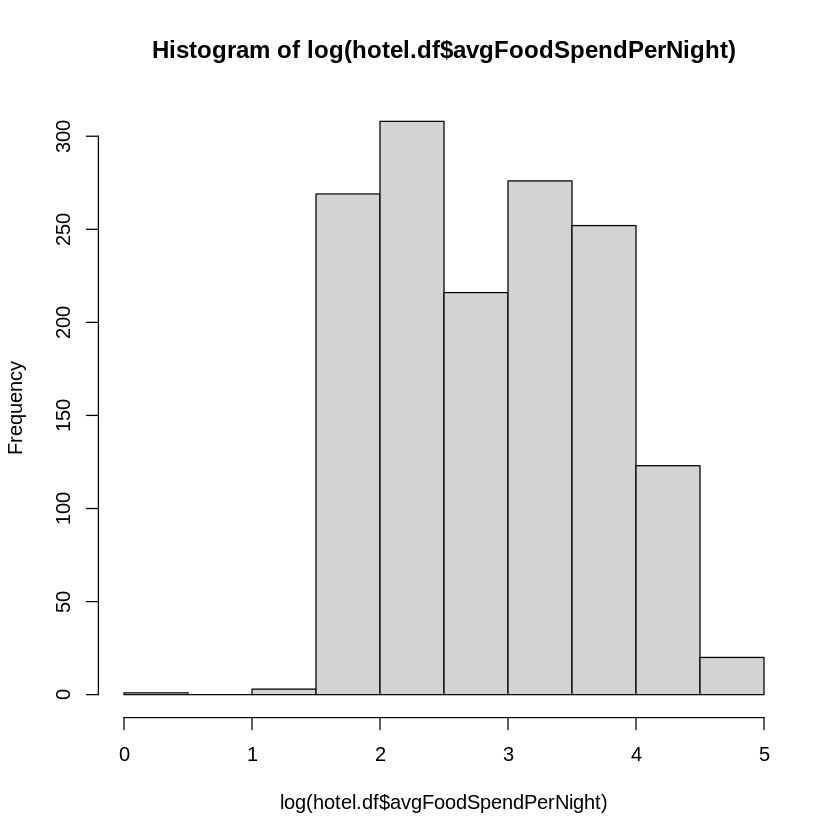

In [ ]:
hist(hotel.df$avgFoodSpendPerNight)
hist(log(hotel.df$avgFoodSpendPerNight))
par(mfrow=c(1, 1)) # requesting graph

In [ ]:
hotel.df$distanceTraveled     <- log(hotel.df$distanceTraveled)
hotel.df$nightsStayed         <- log(hotel.df$nightsStayed)
hotel.df$avgFoodSpendPerNight <- log(hotel.df$avgFoodSpendPerNight)

In [ ]:
install.packages("corrplot") # installing package for correlation
library("corrplot") # for correlation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



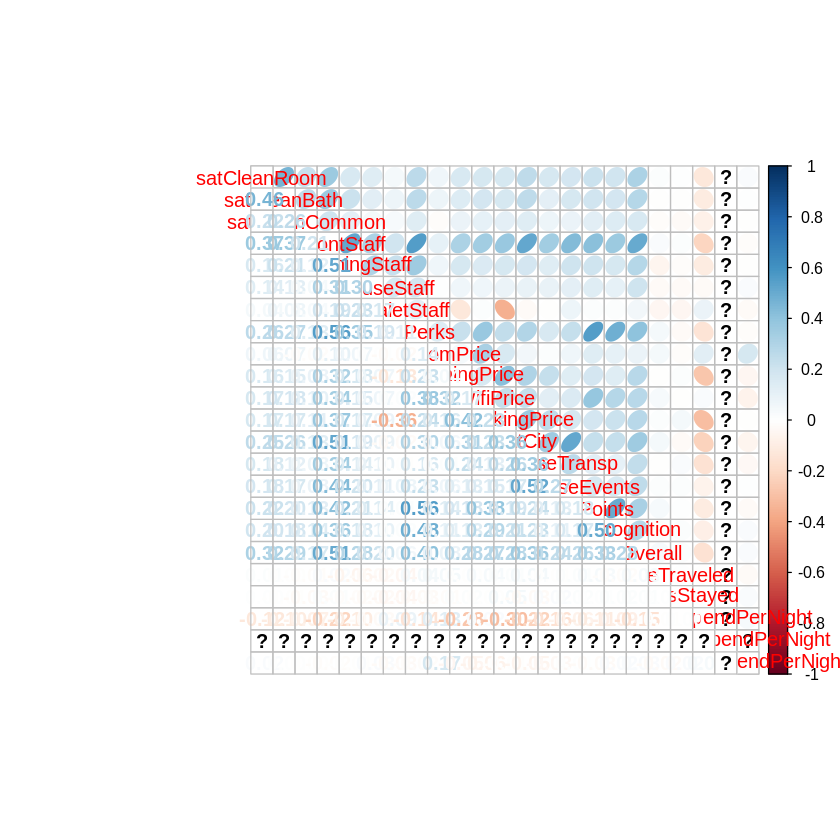

In [ ]:
corrplot.mixed(cor(hotel.df [, c(1:20,22:24)]), upper = "ellipse")

In [ ]:
# single predictor linear model using the above variables
step.four.mod <- lm(satOverall~satPerks, data = hotel.df)
summary(step.four.mod)


Call:
lm(formula = satOverall ~ satPerks, data = hotel.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2559 -0.8442  0.1558  0.7441  3.1558 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.19760    0.10739   20.46   <2e-16 ***
satPerks     0.41166    0.02416   17.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.051 on 1498 degrees of freedom
Multiple R-squared:  0.1623,	Adjusted R-squared:  0.1618 
F-statistic: 290.3 on 1 and 1498 DF,  p-value: < 2.2e-16


In [ ]:
# Linear model with multiple predictors
step.five.mod <- lm(satOverall~ satFrontStaff + satCity, data = hotel.df)
summary(step.five.mod)


Call:
lm(formula = satOverall ~ satFrontStaff + satCity, data = hotel.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.00802 -0.58279 -0.00802  0.56674  2.99198 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.70895    0.10411  16.415  < 2e-16 ***
satFrontStaff  0.44404    0.02606  17.041  < 2e-16 ***
satCity        0.13072    0.02599   5.031 5.48e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.983 on 1497 degrees of freedom
Multiple R-squared:  0.2681,	Adjusted R-squared:  0.2672 
F-statistic: 274.2 on 2 and 1497 DF,  p-value: < 2.2e-16


In [ ]:
# Linear model with factor predictors
# inspect the influence of distance traveled, purpose of the visit, and elite status on the overall satisfaction
fac.pred <- lm(satOverall ~ distanceTraveled + visitPurpose + eliteStatus, data = hotel.df)
summary(fac.pred)


Call:
lm(formula = satOverall ~ distanceTraveled + visitPurpose + eliteStatus, 
    data = hotel.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9647 -0.7205  0.0387  0.6772  3.4745 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               4.23866    0.19067  22.230  < 2e-16 ***
distanceTraveled          0.03357    0.02816   1.192  0.23347    
visitPurposeConcert      -0.24830    0.09886  -2.512  0.01213 *  
visitPurposeConference   -0.25839    0.09503  -2.719  0.00662 ** 
visitPurposeOtherOrMixed -0.14367    0.10327  -1.391  0.16435    
visitPurposeSportsEvent  -0.47094    0.08855  -5.319 1.21e-07 ***
visitPurposeVacation     -0.35358    0.09657  -3.661  0.00026 ***
eliteStatusNoStatus      -0.56592    0.08256  -6.855 1.04e-11 ***
eliteStatusPlatinum       0.50041    0.10871   4.603 4.51e-06 ***
eliteStatusSilver        -0.24381    0.07887  -3.091  0.00203 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ 